Impoting modules

In [12]:

from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

reading the dataset

In [1]:
import pandas as pd
import requests
from io import StringIO

url = requests.get("https://drive.google.com/file/d/1pZhzZnaPi74aKCQImSPrzrTxWzVeE0qv/view?usp=sharing")
csv_raw = StringIO(url.text)
dfs = pd.read_csv(csv_raw)
#sepating the output from the main data
Y=df['class']
X=df.values
X

ParserError: Error tokenizing data. C error: Expected 284 fields in line 130, saw 390


In [50]:
##removiing the unnecessry columns from the dataset like name and id columns
X=np.delete(X,169,1)
X=np.delete(X,0,1)
X=np.delete(X,0,1)
X=np.delete(X,0,1)
X

array([[46, -108, -60, ..., -50, -112, 96],
       [41, -188, -145, ..., -61, -136, 79],
       [46, -194, -145, ..., -67, -145, 39],
       ...,
       [44, -102, -19, ..., -66, -144, -6],
       [51, -121, -23, ..., -44, -116, 117],
       [51, -122, -23, ..., -44, -115, 118]], dtype=object)

In [51]:
#splitting dataset 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

## Here we will start our ML process first with Preprocessing
### why StandardScaler?
The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.
In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).
Given the distribution of the data, each value in the dataset will have the mean value subtracted, and then divided by the standard deviation of the whole dataset (or feature in the multivariate case).

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Training model its a Sequential model
### Why Sequential Model
It allows you to easily stack sequential layers (and even recurrent layers) of the network in order from input to output.
In this model use of 2 dense layer with different activating function are used at first relu and at second its sigmoid

In [29]:
model=Sequential()
layer1=Dense(units=166,activation='relu',input_dim=166)
model.add(layer1)
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=15,batch_size=50,validation_data=(x_test,y_test))

Train on 5278 samples, validate on 1320 samples
Epoch 1/15
5278/5278 [==============================] - 4s 707us/step - loss: 0.1977 - acc: 0.9244 - val_loss: 0.1217 - val_acc: 0.9568
Epoch 2/15
5278/5278 [==============================] - 2s 382us/step - loss: 0.1023 - acc: 0.9646 - val_loss: 0.0988 - val_acc: 0.9621
Epoch 3/15
5278/5278 [==============================] - 2s 412us/step - loss: 0.0682 - acc: 0.9757 - val_loss: 0.0891 - val_acc: 0.9629
Epoch 4/15
5278/5278 [==============================] - 2s 367us/step - loss: 0.0506 - acc: 0.9820 - val_loss: 0.0570 - val_acc: 0.9750
Epoch 5/15
5278/5278 [==============================] - 2s 372us/step - loss: 0.0368 - acc: 0.9875 - val_loss: 0.0708 - val_acc: 0.9667
Epoch 6/15
5278/5278 [==============================] - 2s 388us/step - loss: 0.0298 - acc: 0.9915 - val_loss: 0.0394 - val_acc: 0.9848
Epoch 7/15
5278/5278 [==============================] - 2s 402us/step - loss: 0.0202 - acc: 0.9932 - val_loss: 0.0349 - val_acc: 0.9879


## overall accuracy and loss

In [30]:
predications=model.predict(x_test)
score=model.evaluate(x_test,y_test)
score

1320/1320 [==============================] - 0s 276us/step


[0.013671884314636841, 0.996969696969697]

## Plotting graph


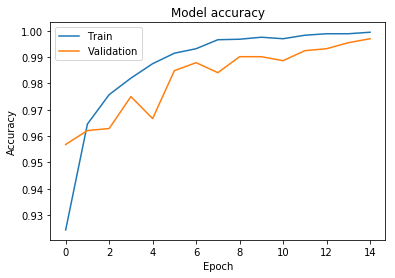

In [52]:
import matplotlib.pyplot as plt



# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




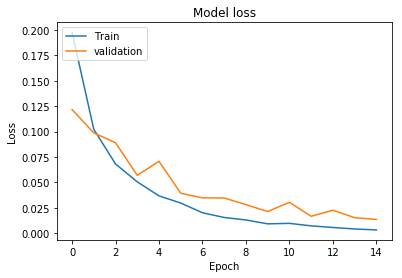

In [53]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()